In [1]:
import Pyomic
import scanpy as sc
import matplotlib.pyplot as plt
Pyomic.utils.pyomic_plot_set()

/Users/julia/miniforge3/envs/nocd/lib/python3.8/site-packages/phate/__init__.py


In [2]:
import anndata
adatacrc=anndata.read_h5ad('/Users/julia/USTB/Pyomic/crc_data.h5ad')
adatacrc

AnnData object with n_obs × n_vars = 132726 × 1458
    obs: 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'scsa_celltype', 'major_celltype', 'scsa_true_celltype'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'dendrogram_leiden', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'rank_genes_groups', 'scrublet', 'scsa_celltype_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [3]:
adata_can=adatacrc[adatacrc.obs['scsa_true_celltype'].isin(["Epithelial cell","Cancer stem cell"])]

In [4]:
adata_can

View of AnnData object with n_obs × n_vars = 11410 × 1458
    obs: 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'scsa_celltype', 'major_celltype', 'scsa_true_celltype'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'dendrogram_leiden', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'rank_genes_groups', 'scrublet', 'scsa_celltype_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [7]:
adata_can.uns['log1p']['base']=None

In [8]:
sc.tl.pca(adata_can, n_comps=100, svd_solver="auto")
sc.pp.neighbors(adata_can, metric="cosine")
sc.tl.leiden(adata_can)
sc.tl.paga(adata_can)
sc.pl.paga(adata_can, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(adata_can,init_pos='paga')
sc.tl.dendrogram(adata_can,'leiden')
sc.tl.rank_genes_groups(adata_can, 'leiden', method='wilcoxon')

computing PCA
Note that scikit-learn's randomized PCA might not be exactly reproducible across different computational platforms. For exact reproducibility, choose `svd_solver='arpack'.`
    on highly variable genes
    with n_comps=100
    finished (0:00:05)
computing neighbors
    using 'X_pca' with n_pcs = 100
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
running Leiden clustering
    finished: found 12 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:04)
    using 'X_pca' with n_pcs = 100
Storing dendrogram inf

In [65]:
sc.tl.leiden(adata_can)

running Leiden clustering
    finished: found 17 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


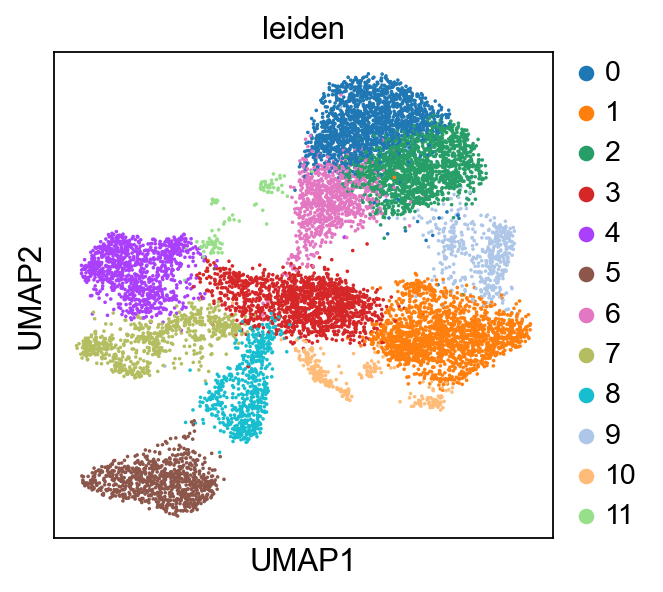

In [9]:
sc.pl.umap(adata_can, color=['leiden'])

In [71]:
results_file = 'crc-via.h5ad' 
adata_can.write(results_file)

In [88]:
crc=anndata.read_h5ad('/Users/julia/USTB/Pyomic/crc-via.h5ad')
crc

AnnData object with n_obs × n_vars = 11410 × 1458
    obs: 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'scsa_celltype', 'major_celltype', 'scsa_true_celltype'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'dendrogram_leiden', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'rank_genes_groups', 'scrublet', 'scsa_celltype_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [10]:
via=ov.single.pySCSA(adata=adata_can,
                          foldchange=1.5,
                          pvalue=0.01,
                          celltype='cancer',
                          target='cancersea',
                          tissue='All',
)

......Loading dataset from temp/pySCSA_2023.db


In [20]:
celltype=via.cell_anno(clustertype='leiden',
               cluster='all')

...Auto annotate cell
Version V2.0 [2023/04/07]
DB load: GO_items:47347,Human_GO:3,Mouse_GO:3,
CellMarkers:96074,CancerSEA:1574,
Ensembl_HGNC:61541,Ensembl_Mouse:55414
Namespace(Gensymbol=True, MarkerDB=None, celltype='cancer', cluster='all', db='temp/pySCSA_2023.db', fc='/Users/julia/Library/Jupyter/runtime/kernel-2d3bd063-8833-49d0-8da7-6b51af609ab0.json', foldchange=1.5, input='temp/rna.csv', list_tissue=False, noprint=True, norefdb=False, outfmt='txt', output='temp/rna_anno.txt', pvalue=0.01, source='scanpy', species='Human', target='cancersea', tissue='All', weight=100.0)
Version V2.0 [2023/04/07]
DB load: GO_items:47347,Human_GO:3,Mouse_GO:3,
CellMarkers:96074,CancerSEA:1574,
Ensembl_HGNC:61541,Ensembl_Mouse:55414
load markers: 15107
Cluster 0 Gene number: 285
Other Gene number: 278
Cluster 1 Gene number: 302
Other Gene number: 341
Cluster 10 Gene number: 140
Other Gene number: 352
Cluster 11 Gene number: 534
Other Gene number: 283
Cluster 2 Gene number: 142
Other Gene number: 34

In [16]:
via.cell_auto_anno(adata_can)

...cell type added to scsa_celltype on obs of anndata


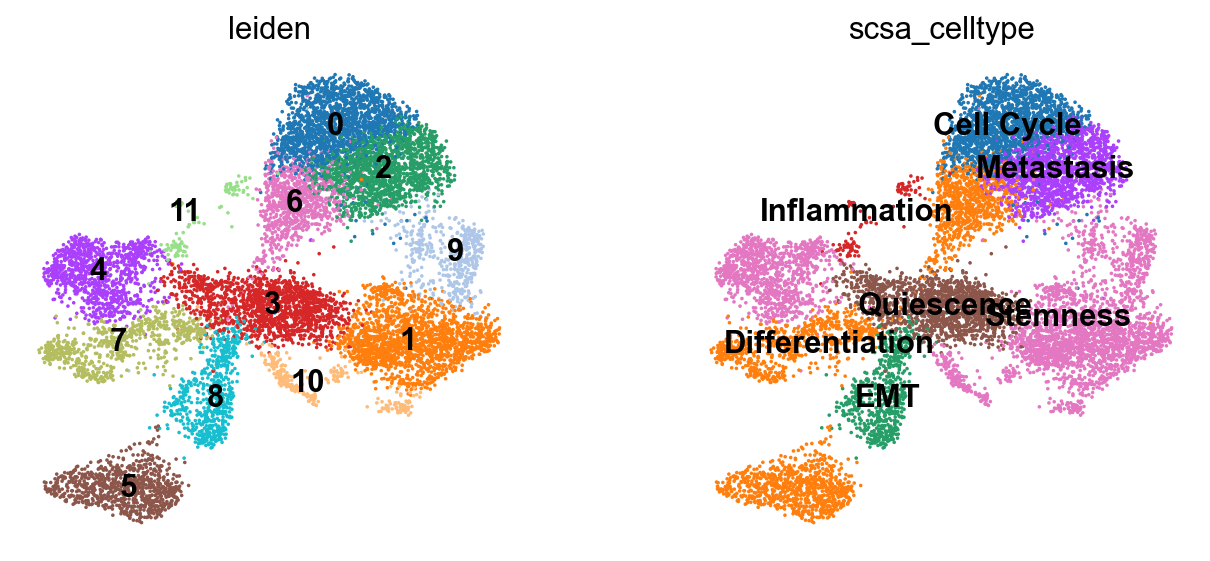

In [17]:
sc.pl.umap(adata_can, color=['leiden','scsa_celltype'], legend_loc='on data', frameon=False)

In [66]:
cluster2annotation = {
     '0': 'Cell Cycle',
     '1': 'Metastasis',
     '2': 'Metastasis',
     '3': 'Quiescence',
     '4': 'Stemness',
     '5': 'Differentiation',
     '6': 'Invasion',
     '7': 'Stemness',
     '8': 'EMT',
     '9': 'Metastasis',
     '10': 'Stemness',
     '11': 'Inflammation'
}

In [67]:
ov.single.scanpy_cellanno_from_dict(adata_can,anno_dict=cluster2annotation,
                                       clustertype='leiden')

...cell type added to major_celltype on obs of anndata


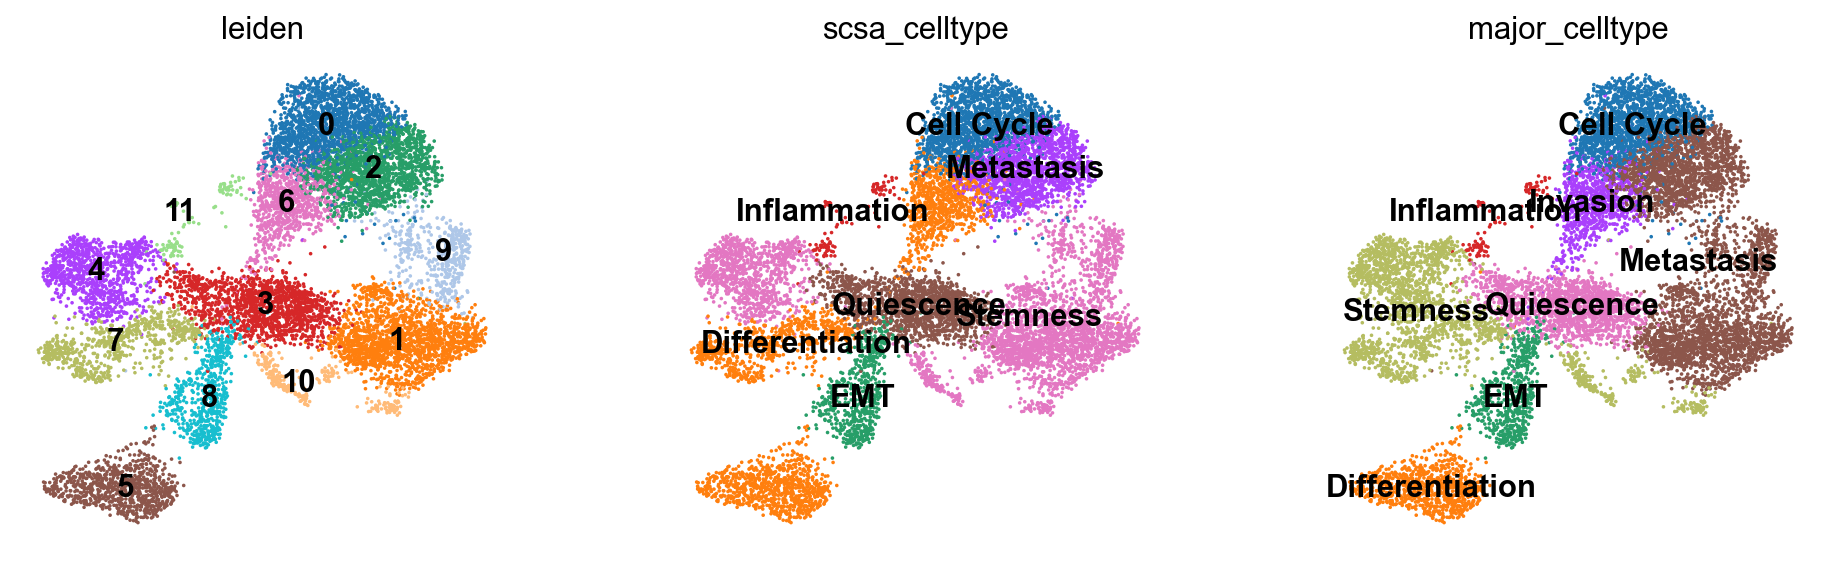

In [68]:
sc.pl.umap(adata_can, color=['leiden','scsa_celltype','major_celltype'], legend_loc='on data', frameon=False)

In [73]:
v0 = ov.single.pyVIA(adata=adata_can,adata_key='X_pca',adata_ncomps=80, basis='X_umap',
                         clusters='major_celltype',knn=30,random_seed=4,root_user=['Stemness'],dataset='group')

v0.run()

2023-05-09 00:56:30.013333	Running VIA over input data of 11410 (samples) x 80 (features)
2023-05-09 00:56:30.013729	Knngraph has 30 neighbors
2023-05-09 00:56:33.044337	Finished global pruning of 30-knn graph used for clustering at level of 0.15. Kept 44.3 % of edges. 
2023-05-09 00:56:33.078763	Number of connected components used for clustergraph  is 1
2023-05-09 00:56:33.545202	Commencing community detection
2023-05-09 00:56:33.712832	Finished running Leiden algorithm. Found 104 clusters.
2023-05-09 00:56:33.715016	Merging 83 very small clusters (<10)
2023-05-09 00:56:33.717135	Finished detecting communities. Found 21 communities
2023-05-09 00:56:33.717617	Making cluster graph. Global cluster graph pruning level: 0.15
2023-05-09 00:56:33.754116	Graph has 1 connected components before pruning
2023-05-09 00:56:33.755414	Graph has 1 connected components after pruning
2023-05-09 00:56:33.755507	Graph has 1 connected components after reconnecting
2023-05-09 00:56:33.755814	0.0% links tri

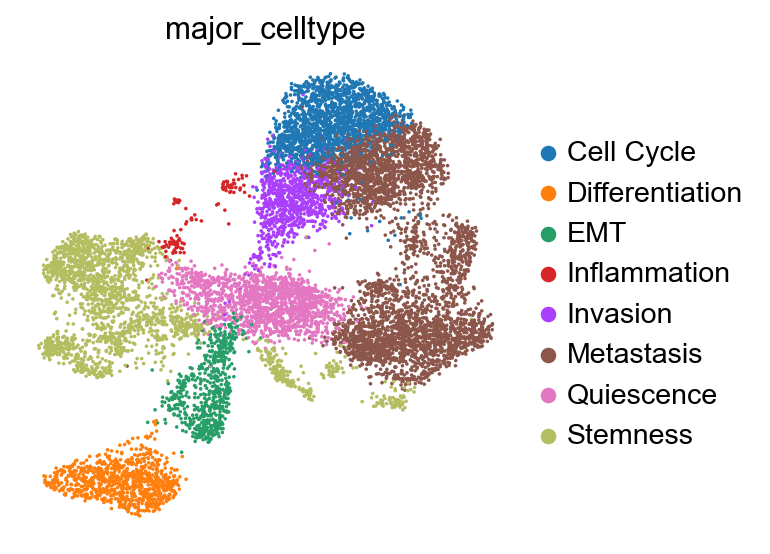

In [76]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
sc.pl.embedding(
    adata_can,
    basis="X_umap",
    color=['major_celltype'],
    frameon=False,
    ncols=1,
    wspace=0.5,
    show=False,
    ax=ax
)
fig.savefig('via_fig1.png',dpi=300,bbox_inches = 'tight')

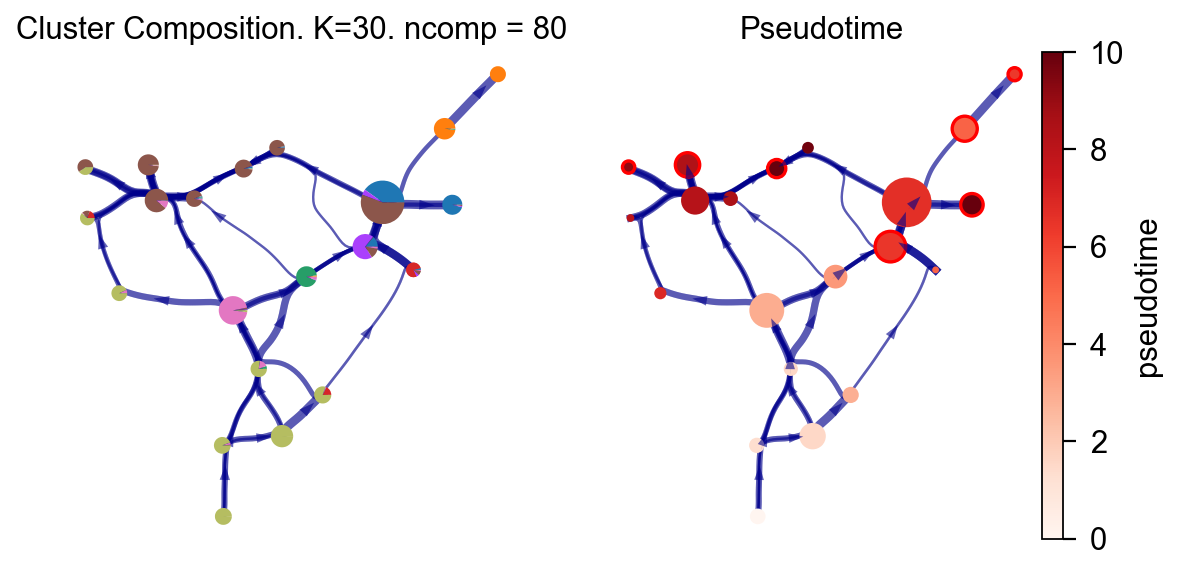

In [77]:
fig, ax, ax1 = v0.plot_piechart_graph(clusters='major_celltype',cmap='Reds',dpi=80,
                                   show_legend=False,ax_text=False,fontsize=4)
fig.savefig('via_fig2.png',dpi=300,bbox_inches = 'tight')

In [78]:
v0.get_pseudotime(v0.adata)
v0.adata

...the pseudotime of VIA added to AnnData obs named `pt_via`


AnnData object with n_obs × n_vars = 11410 × 1458
    obs: 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'scsa_celltype', 'major_celltype', 'scsa_true_celltype', 'pt_via'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'dendrogram_leiden', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'rank_genes_groups', 'scrublet', 'scsa_celltype_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


2023-05-09 01:11:23.830520	Super cluster 2 is a super terminal with sub_terminal cluster 2
2023-05-09 01:11:23.880765	Super cluster 5 is a super terminal with sub_terminal cluster 5
2023-05-09 01:11:23.880868	Super cluster 6 is a super terminal with sub_terminal cluster 6
2023-05-09 01:11:23.880909	Super cluster 8 is a super terminal with sub_terminal cluster 8
2023-05-09 01:11:23.880951	Super cluster 9 is a super terminal with sub_terminal cluster 9
2023-05-09 01:11:23.881002	Super cluster 15 is a super terminal with sub_terminal cluster 15
2023-05-09 01:11:23.881046	Super cluster 16 is a super terminal with sub_terminal cluster 16


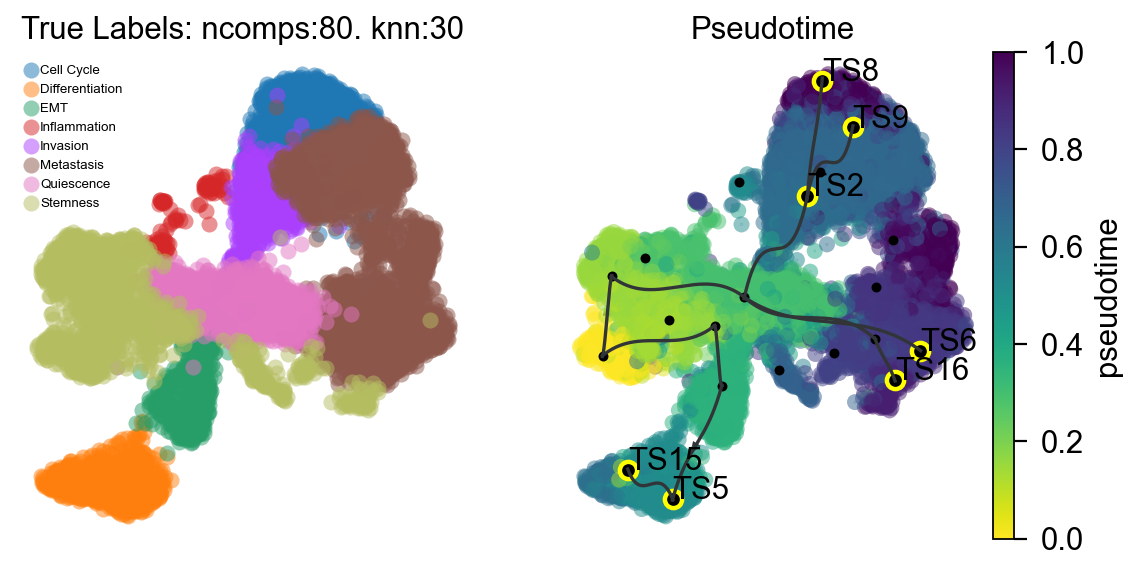

In [86]:
fig,ax1,ax2=v0.plot_trajectory_gams(basis='X_umap',clusters='major_celltype',draw_all_curves=False)
fig.savefig('via_fig3.png',dpi=300,bbox_inches = 'tight')

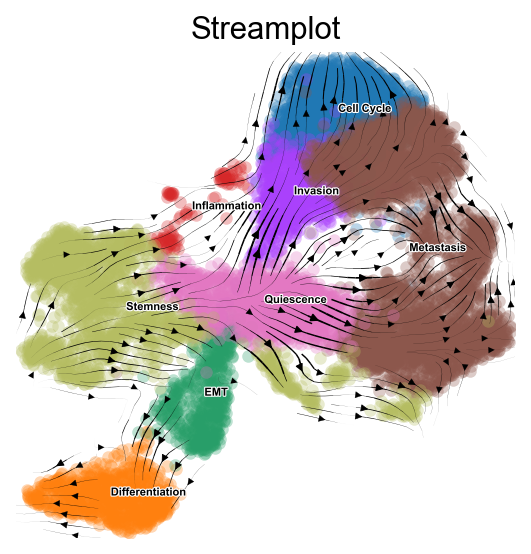

In [87]:
fig,ax=v0.plot_stream(basis='X_umap',clusters='major_celltype',
               density_grid=0.8, scatter_size=30, scatter_alpha=0.3, linewidth=0.5)
fig.savefig('via_fig4.png',dpi=300,bbox_inches = 'tight')